Topic: Challenge Set 3  
Subject: Pandas Movie Data  
Date: 01/20/2018  
Name: Laura Chen  
Worked with: N/A

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('2013_movies.csv')

%matplotlib inline

In [143]:
df.head(3)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,ReleaseMonth
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22,November
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03,May
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,November


In [108]:
df['ReleaseDate']=pd.to_datetime(df['ReleaseDate'])

Challenge 1

Plot domestic total gross over time.

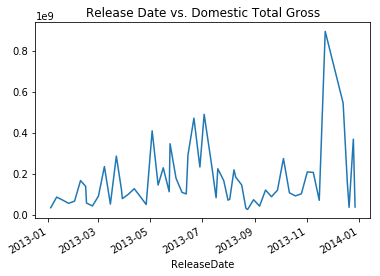

In [109]:
df.groupby('ReleaseDate').DomesticTotalGross.sum().plot(title="Release Date vs. Domestic Total Gross")

Challenge 2

Plot runtime vs. domestic total gross.

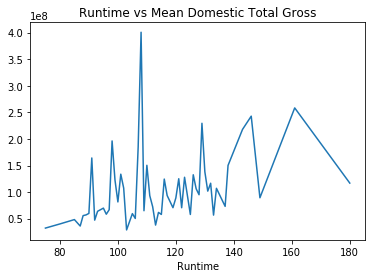

In [111]:
df.groupby('Runtime').DomesticTotalGross.mean().plot(title="Runtime vs Mean Domestic Total Gross")

Challenge 3
Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11e557fd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11e59c630>], dtype=object)

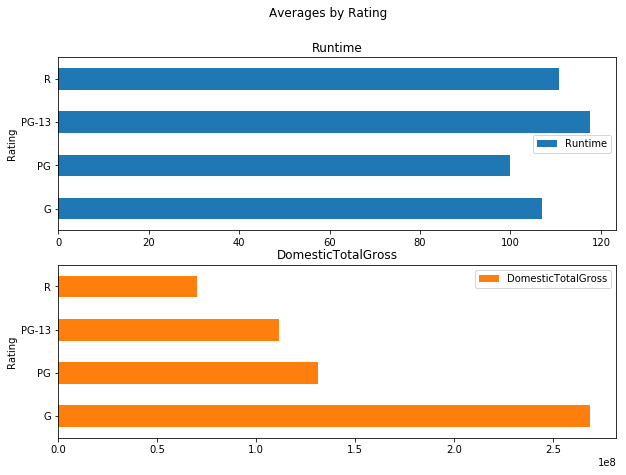

In [86]:
df.groupby('Rating')['Runtime','DomesticTotalGross'].mean().plot(kind='barh',title="Averages by Rating"\
                                                                 ,subplots=True,sharex=False,figsize=(10,7))

Challenge 4

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

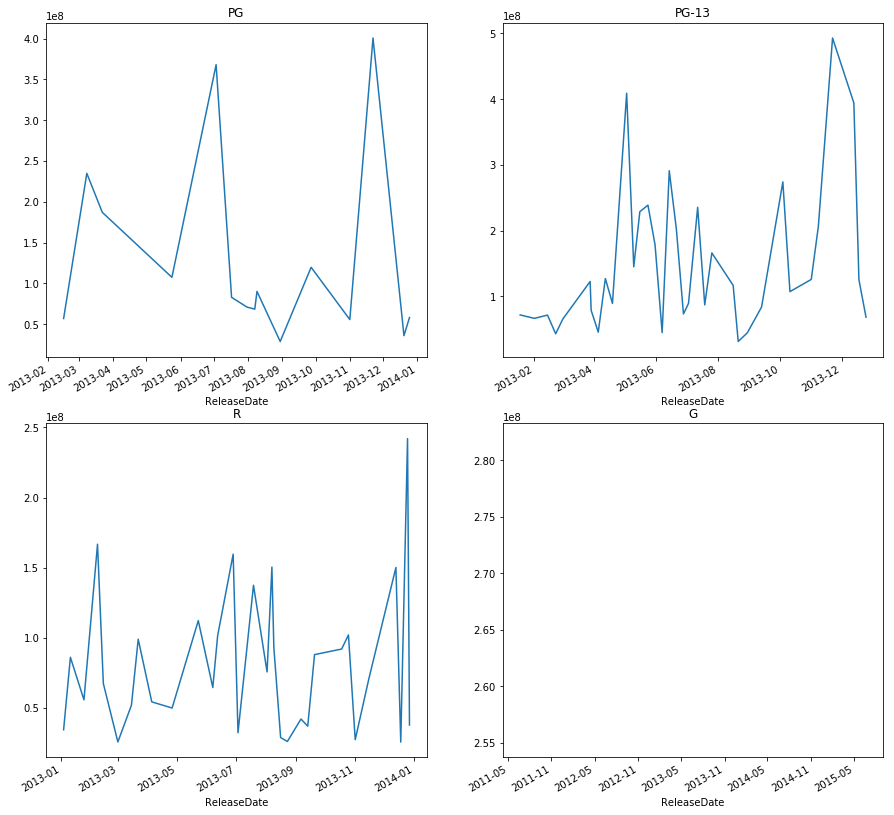

In [115]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,15))

df[df['Rating']=='G'].groupby('ReleaseDate')['DomesticTotalGross'].sum().plot(ax=axes[1,1]); axes[1,1].set_title('G');

df[df['Rating']=='PG'].groupby('ReleaseDate')['DomesticTotalGross'].sum().plot(ax=axes[0,0]); axes[0,0].set_title('PG');

df[df['Rating']=='PG-13'].groupby('ReleaseDate')['DomesticTotalGross'].sum().plot(ax=axes[0,1]); axes[0,1].set_title('PG-13');

df[df['Rating']=='R'].groupby('ReleaseDate')['DomesticTotalGross'].sum().plot(ax=axes[1,0]); axes[1,0].set_title('R');


Challenge 5

What director in your dataset has the highest gross per movie?

In [103]:
df.groupby('Director').sum().sort_values(by='DomesticTotalGross',ascending=False).head(1)

,Budget,DomesticTotalGross,Runtime
Director,,,
Francis Lawrence,130000000.0,424668047,146


Challenge 6

Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

In [128]:
import datetime
df['ReleaseMonth']=df['ReleaseDate'].dt.strftime("%B")

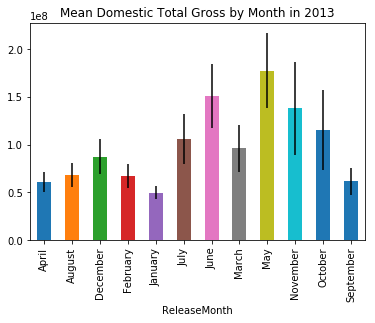

In [146]:
errors=df.groupby('ReleaseMonth').DomesticTotalGross.sem()
df.groupby('ReleaseMonth').DomesticTotalGross.mean()\
    .plot(kind='bar',title="Mean Domestic Total Gross by Month in 2013",yerr=errors);

Standard error of the mean is the std/sqrt(n).  
This seems to make sense. Months with a very high average also have a larger standard error of the mean, indicating that there are some very high grossing movies that are driving up the average. 